In [97]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

### Clustering coefficient

Measures the degree to which nodes in a network tendo to 'cluster' or form triangles

###### # Example 1

In [98]:
g = nx.Graph()

In [99]:
e = list(zip('A A A B B C C D E E F T'.split(), 'K B C C K E F E F H G J'.split()))

In [100]:
g.add_edges_from(e)

In [101]:
g.edges()

EdgeView([('A', 'K'), ('A', 'B'), ('A', 'C'), ('K', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'F'), ('E', 'H'), ('F', 'G'), ('T', 'J')])

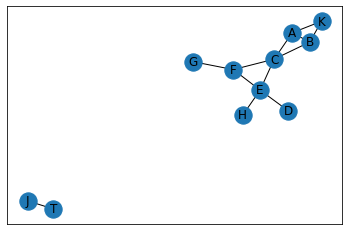

In [102]:
nx.draw_networkx(g)

In [103]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

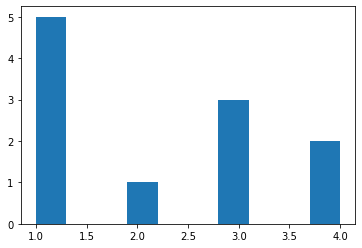

In [104]:
plot_degree_dist(g)

Local clustering coefficient:

(For nodes of degree <= 2, assume LCCoeff of 0)

In [105]:
nx.clustering(g, 'F'), nx.clustering(g, 'A'), nx.clustering(g, 'J')

(0.3333333333333333, 0.6666666666666666, 0)

Global clustering coefficient:

In [106]:
nx.average_clustering(g)

0.28787878787878785

![open triads and triangles](./media/tri.png)

Transitivity: ratio of number of triangles and number of 'open triads' in a network

In [107]:
nx.transitivity(g)

0.4090909090909091

###### # Example 2

![clustering coeffs and transitivity](./media/transitivity.png)

### Distances

Path lenght: Number of edges between two nodes.

Distance: Least number of edges between two nodes.

###### # Example 3

In [108]:
g = nx.Graph()

In [109]:
g.add_edges_from(
    [
        ('A', 'K'),
        ('A', 'B'),
        ('B', 'K'),
        ('B', 'C'),
        ('C', 'F'),
        ('C', 'E'),
        ('F', 'E'),
        ('F', 'G'),
        ('D', 'E'),
        ('E', 'H'),
        ('E', 'I'),
        ('I', 'J')
    ]
)

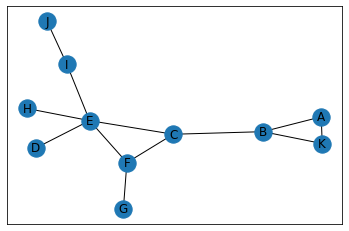

In [110]:
nx.draw_networkx(g)

In [111]:
nx.shortest_path(g, 'A', 'H')

['A', 'B', 'C', 'E', 'H']

In [112]:
nx.shortest_path_length(g, 'A', 'H')

4

- Breadth-first search: Systematic procedure for computing distances from a node to all other nodes in a large network, by 'discovering' nodes in layers. For each leap/edge/iteration/layer, write down the nodes that were  not accounted yet.

![breadth-first search](./media/bfsearch.png)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


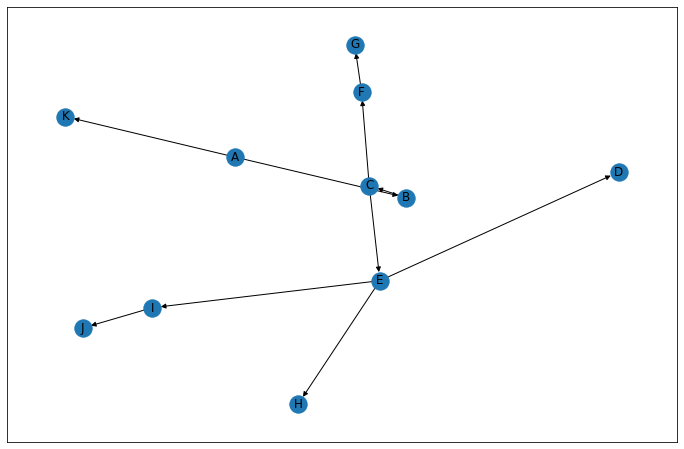

In [113]:
plt.figure(figsize=(12,8))

t = nx.bfs_tree(g, 'A')
nx.draw_networkx(t)

In [114]:
t.edges()

OutEdgeView([('A', 'K'), ('A', 'B'), ('B', 'C'), ('C', 'F'), ('C', 'E'), ('F', 'G'), ('E', 'D'), ('E', 'H'), ('E', 'I'), ('I', 'J')])

In [115]:
nx.shortest_path_length(t, 'A')

{'A': 0,
 'K': 1,
 'B': 1,
 'C': 2,
 'F': 3,
 'E': 3,
 'G': 4,
 'D': 4,
 'H': 4,
 'I': 4,
 'J': 5}

Average distance:

In [116]:
nx.average_shortest_path_length(g)

2.5272727272727273

Diameter: Maximum possible distance between two nodes

In [117]:
nx.diameter(g)

5

Eccentricity: Largest distance between a node and all others

In [118]:
nx.eccentricity(g)

{'A': 5,
 'K': 5,
 'B': 4,
 'C': 3,
 'F': 3,
 'E': 3,
 'G': 4,
 'D': 4,
 'H': 4,
 'I': 4,
 'J': 5}

Radius: Smalles eccentricity of a graph

In [119]:
nx.radius(g)

3

Periphery: Set of nodes that have eccentricity equals to the diameter

In [120]:
nx.periphery(g)

['A', 'K', 'J']

Center: Set of nodes which have eccentricity equals to the radius

In [121]:
nx.center(g)

['C', 'F', 'E']

###### # Example 4

In [177]:
g = nx.karate_club_graph()
g = nx.convert_node_labels_to_integers(g, first_label=1)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


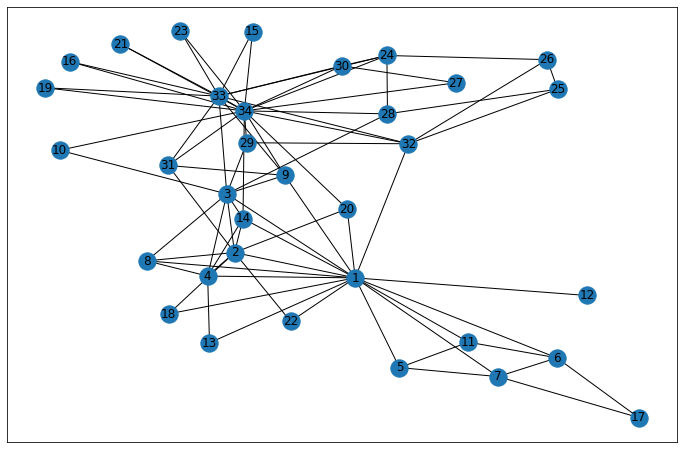

In [178]:
plt.figure(figsize=(12,8))
nx.draw_networkx(g)

In [179]:
def info(graph):
    s = 'radius = {0}\ndiameter = {1}\ncenter = {2}\nperiphery = {3}'
    return s.format(nx.radius(graph),
                    nx.diameter(graph),
                    nx.center(graph),
                    nx.periphery(graph))

In [180]:
print(info(g))

radius = 3
diameter = 5
center = [1, 2, 3, 4, 9, 14, 20, 32]
periphery = [15, 16, 17, 19, 21, 23, 24, 27, 30]


### Connected graphs

An undirected graph is said to be connected when there's a path linking every pair of nodes

In [187]:
nx.is_connected(g)

True

Connected component:

    Subset of the graph, on which:
    - Every node in the subset as a path to every other node
    - No other node (from outside) has a path to any node in the subset

###### # Example 5